# Data Wrangling Project --- WeRateDogs

### -By Zhenwen Xu

#### This is a data wrangling project (also including analysis and visualization) for record which belongs to a Twitter user - @dog_rates, and his nickname of Twitter is 'WeRateDogs'. WeRateDogs is a blogger who rates for various of pet dogs by a humorous method. These rates use 10 as denominator; however, the numerators of these rates are larger than 10 normally, like 11/10, 12/10 or 13/10.

### Background
My goal is to clean Twitter data of WeRateDogs, and then creat interesting and reliable data analysis and visualization. This record is very good, but it just encompass basic information. If it needs to reach to the effect like 'Wow!', I have to gather extra data, assess and clean them before analysis and visualization. 

### Data Set
- The first Dataset is a .csv file which is about 5000 basic Twitter information record which belongs to WeRateDogs, and the record doesn't include all aspects of content. However, one of column in the record contains the text of each Twitter, and this file includes all extracted data like rates, the name of dog and 'stage' (which are doggo, floofer, pupper and puppo) with the previous basic information. By the way, it just filtrates 2356 pieces of Twitter data which include rates and so on.
- The second Dataset is a .tsv file which is a Twitter iamge predictions, like what breed of dog (or other object, animal) is present in each Twitter according to a neural network. And this file needs to download by coding through Requests in Python and specific URL.
- The third Dataset is a .txt file which needs to access using Twitter API in and saving in a file in json format, and then it still needs to be converted to a dataframe.

### Tips:
- Although there are 5000 items in dataset, we just need original rates containing images;
- Completely assessing and cleaning data would cost too much time, so this project just requires that assessing and cleaning process only needs to list 8 Quaility problems and 2 Tidiness problems;
- According to the rules of Tidy data, this project's data cleaning process has to include combining three dataframes;
- If the numerators of rate is over than the denominators, it doesn't need to be cleaned (Also, don't need to care about the reverse condition);
- Don't need to gather data after 08/01/2017.

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import os
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Gather Dataset

#### First of all,  read the first dataset - 'twitter_archive_enhanced.csv'.

In [2]:
# 1. Read the Twitter archive enhanced file
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Then,  it turns to the second dataset - 'image_predictions.tsv'.

In [12]:
# 2. Use Requests library and provided URL to download .tsv file
URL = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(URL)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# 3. Read the image predictions file
df_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Finally, use tweepy library and Twitter API to download data and create .txt file.

In [4]:
# 4. Download data from Twitter using tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
# 5. Store Tweet data in tweet_json.txt file using twitter API
with open('tweet_json.txt', 'w') as file:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet_content = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet_content._json, file)
            file.write('\n')
        except Exception as e:
            print(tweet_id, e)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 424


802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770743923962707968 [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 453
Rate limit reached. Sleeping for: 467


In [13]:
# Read content in the tweet_json file and then store to dataframe
tweets_data = []
with open('tweet_json.txt', "r") as tweet_file:
    for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
        
tweet_file.close()

In [14]:
# Add the specific columns to the dataframe
df_tweet = pd.DataFrame()
df_tweet['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
df_tweet['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
df_tweet['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [15]:
# Replace the column title 'id' to 'tweet_id'
df_tweet.rename(columns={'id':'tweet_id'}, inplace=True)
df_tweet.sample(10)

,tweet_id,retweet_count,favorite_count
1367,700864154249383937,661,2744
2186,668645506898350081,562,924
1690,680836378243002368,1437,3653
402,822975315408461824,3792,18504
1655,682406705142087680,1910,8028
248,844223788422217728,2357,14313
62,879862464715927552,3473,22125
1309,706169069255446529,2395,4127
2149,669371483794317312,187,509
1328,704761120771465216,3126,7019


## 2. Assess Dataset

##### Firstly, check basic content of DataFrame for all three datasets: 

In [16]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2122,670403879788544000,NaN,NaN,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,None,None,None,None
1038,744334592493166593,NaN,NaN,2016-06-19 01:02:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blanket. She has overthrown her human....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744334592...,11,10,Blanket,None,None,None,None
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
1585,686947101016735744,NaN,NaN,2016-01-12 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. He was specifically told not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686947101...,11,10,Jackson,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074...,11,10,None,None,None,None,None
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
832,768596291618299904,NaN,NaN,2016-08-24 23:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oakley and Charlie. They're convi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768596291...,12,10,Oakley,None,None,None,None


In [17]:
df_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True,bluetick,0.036615,True,basset,0.017848,True
1673,813127251579564032,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,1,Norwegian_elkhound,0.432416,True,whippet,0.374223,True,Siberian_husky,0.032463,True
1823,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,ice_bear,0.330573,False,soft-coated_wheaten_terrier,0.196476,True,Irish_terrier,0.073097,True
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,Norfolk_terrier,0.129114,True,Pomeranian,0.120822,True
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False


In [18]:
df_tweet.sample(10)

,tweet_id,retweet_count,favorite_count
1407,698178924120031232,796,2962
641,792394556390137856,4763,14582
718,781955203444699136,3722,11974
664,789530877013393408,3749,12732
184,855857698524602368,2202,12125
1478,692752401762250755,3921,7231
2109,670374371102445568,279,762
1034,743222593470234624,2059,6565
1575,686618349602762752,1467,3896
1641,683357973142474752,1018,3109


##### Then, check info( ) for three datasets: 

In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null int64
retweet_count     2341 non-null int64
favorite_count    2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


##### check duplicate tweet_id for three datasets:

In [22]:
df_archive.tweet_id.duplicated().sum()

0

In [23]:
df_prediction.tweet_id.duplicated().sum()

0

In [24]:
df_tweet.tweet_id.duplicated().sum()

0

##### Then, check each dataset in details:

#### `For df_archive:`

##### check data issues about rates of dog:

In [25]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### check data issues about names of dog:

In [27]:
df_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
an                7
Toby              7
Daisy             7
Bailey            7
Buddy             7
Milo              6
Stanley           6
Oscar             6
Koda              6
Leo               6
Jax               6
Jack              6
Rusty             6
Bella             6
Scout             6
Dave              6
Chester           5
               ... 
Jaspers           1
my                1
unacceptable      1
Alfy              1
Rumble            1
Asher             1
Ben               1
Chadrick          1
Caryl             1
Gabby             1
Beemo             1
Pippin            1
Lili              1
Gin               1
Chase             1
Ridley            1
Iggy              1
Tripp             1
Taco              1


It is clear that 745 dogs don't have names, 55 dogs are just called 'a', and 15 dogs are named as 'an' or 'the'.

##### check data issue about the dog stage

In [28]:
# Check whether there are some rows which don't have any value about the stage, and count the number of them
None_value = df_archive[(df_archive.doggo == 'None') & (df_archive.floofer == 'None') 
                        & (df_archive.pupper == 'None') & (df_archive.puppo == 'None')]
len(None_value)

1976

In [29]:
# Check whether there are some rows which have more than one value about the stage, and count the number of them
More_value = df_archive[(df_archive.doggo != 'None') & ((df_archive.floofer != 'None') 
                        | (df_archive.pupper != 'None') | (df_archive.puppo != 'None'))]
len(More_value)

14

#### `For df_prediction:`

##### check  duplicate  jpg image URLs

In [30]:
df_prediction.jpg_url.duplicated().sum()

66

##### check the confidence-levels' order

In [31]:
# 1.if p1_conf > p2_conf, the following code will get empty dataframe
df_prediction[(df_prediction.p1_conf == True) & (df_prediction.p2_conf == True) & (df_prediction.p3_conf == False)
              & (df_prediction.p2_conf > df_prediction.p1_conf)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
# 2.if p1_conf > p3_conf, the following code will get empty dataframe
df_prediction[(df_prediction.p1_conf == True) & (df_prediction.p2_conf == False) & (df_prediction.p3_conf == True)
              & (df_prediction.p3_conf > df_prediction.p1_conf)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
# 3.if p2_conf > p3_conf, the following code will get empty dataframe
df_prediction[(df_prediction.p1_conf == False) & (df_prediction.p2_conf == True) & (df_prediction.p3_conf == True)
              & (df_prediction.p3_conf > df_prediction.p2_conf)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


From the result above, it is clear that the order of confidence_levels is p1_conf > p2_conf > p3_conf.

#### Completeness
##### `df_archive` table
- Many rows have no value for the dog stage(all columns about dog stage are None in the row), and some rows have more than one entry for dog stages

#### Quality
##### `df_archive` table
###### visual assessment
- It has link at the end of each item in the *text* column
- Sometimes items in the *text* column start with 'RT @dogs_rates:'
- Information about retweets are not needed, like *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp*
- Some values in *rating_numerator* and *rating_denominator* are too large, like 90 or even over 100

###### programming assessment
- Columns *in_reply_to_status_id* and *in_reply_to_user_id* are float data type
- Columns *timestamp* and *retweeted_status_timestamp* are string  not datetime data type
- Missing name of the dog in *name* column `(I cannot solve this one)`

##### `df_prediction` table
###### visual assessment
- The names in columns *p1*, *p2* and *p3* have unconsistent spelling (like 'Lakeland_terrier' and 'sea_lion')
- The names in columns *p1*, *p2* and *p3* have '_' and '-' between each word
- The values of columns *p1_conf*, *p2_conf* and *p3_conf* need to be rounded

###### programming assessment
- 66 jpg image URLs are duplicated
- The data only has 2075 tweet ids compared to 2356 tweet ids in df_archive

##### `df_tweet` table
###### programming assessment
- The data only has 2341 tweet ids compared to 2356 tweet ids in df_archive

#### Tidiness
##### `df_archive` table
- Multiple columns for dog stages (*doggo*, *floofer*, *pupper*, *puppo*) are not needed 

##### `df_prediction` table
- Summarize three predictions into one column

##### `df_tweet` table
- df_tweet, df_prediction and df_archive should be combined to form one single dataframe

## 3. Clean Dataset

In [34]:
# copy each data set to operate subsequently
df_archive_clean = df_archive.copy()
df_prediction_clean = df_prediction.copy()
df_tweet_clean = df_tweet.copy()

### Completeness 

#### `C1.` Many rows have no value for the dog stage(all columns about dog stage are None in the row), and some rows have more than one entry for dog stages 

##### Define
- Check the *text* column to list all data which have more than one dog stages, and then create a new column called *multiple*
- There are 1976 rows which have no value for the dog stages, so it is hard to check all of them

##### Code

In [35]:
# First of all, use str.findall() and RE to re-extract dog stage
stage_list = df_archive_clean.text.str.findall('doggo|floofer|pupper|puppo')
stage_list

0             []
1             []
2             []
3             []
4             []
5             []
6             []
7             []
8             []
9        [doggo]
10            []
11            []
12       [puppo]
13            []
14       [puppo]
15            []
16            []
17            []
18            []
19            []
20            []
21            []
22            []
23            []
24            []
25            []
26            []
27            []
28            []
29      [pupper]
          ...   
2326          []
2327          []
2328          []
2329          []
2330          []
2331          []
2332          []
2333          []
2334          []
2335          []
2336          []
2337          []
2338          []
2339          []
2340          []
2341          []
2342          []
2343          []
2344          []
2345          []
2346          []
2347          []
2348          []
2349          []
2350          []
2351          []
2352          []
2353          

In [36]:
# Process distinct operation to check whethr it still have duplicate.
new_stage = []
for stage in stage_list:
    if stage not in new_stage:
        new_stage.append(stage)
new_stage

[[],
 ['doggo'],
 ['puppo'],
 ['pupper'],
 ['floofer'],
 ['puppo', 'doggo'],
 ['pupper', 'doggo', 'doggo'],
 ['doggo', 'pupper'],
 ['pupper', 'pupper'],
 ['pupper', 'doggo'],
 ['pupper', 'pupper', 'pupper']]

In [37]:
# Use enumerate() to traverse all index in the stage list, and find all index of several dog stages, and change the wrong dog stage
[i for i,v in enumerate(list(stage_list)) if v==['puppo', 'doggo']]

[172, 191]

In [38]:
df_archive_clean.loc[df_archive_clean.index == 172, 'puppo'] = 'puppo'
df_archive_clean.loc[[172,191]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [39]:
[i for i,v in enumerate(list(stage_list)) if v==['doggo', 'pupper']]

[565, 575, 705, 778, 889, 956, 1113]

In [40]:
# This part doesn't need to modify
df_archive_clean.loc[[565, 575, 705, 778, 889, 956, 1113]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None


In [41]:
# This part have two same dog stage, so we need to solve it in the tidiness question
[i for i,v in enumerate(list(stage_list)) if v==['pupper', 'pupper']]

[631, 1304, 1340, 1367, 1653, 1788, 1828]

In [42]:
# This part have two same dog stage, so we need to solve it in the tidiness question
[i for i,v in enumerate(list(stage_list)) if v==['pupper', 'doggo']]

[822, 1063]

In [43]:
# This part have two same dog stage, so we need to solve it in the tidiness question
[i for i,v in enumerate(list(stage_list)) if v==['pupper', 'doggo', 'doggo']]

[531]

In [44]:
# This part have three same dog stage, so we need to solve it in the tidiness question
[i for i,v in enumerate(list(stage_list)) if v==['pupper', 'pupper', 'pupper']]

[1907]

##### The above index is about the rows which have several dog stages extracting from text, it has to check with the given dog stage columns whether it misses something.

In [45]:
# List rows which have more than one dog stages
more_stage_1 = df_archive_clean[(df_archive_clean.doggo != 'None') & ((df_archive_clean.floofer != 'None') 
                        | (df_archive_clean.pupper != 'None') | (df_archive_clean.puppo != 'None'))]
more_stage_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None


After check all *text* columns of these 14 rows, I found No.191, No.200 and No.460 rows have clear results about the dog stage, and the remaining rows show that the text mentions two dogs. So, for these remaining rows, I choose to create a new column called 'multiple'.

In [46]:
# First, update No.191, No.200 and No.460 rows results of the dog stage
df_archive_clean.loc[df_archive_clean.tweet_id == 855851453814013952, 'doggo'] = 'None'
df_archive_clean.loc[df_archive_clean.tweet_id == 854010172552949760, 'doggo'] = 'None'
df_archive_clean.loc[df_archive_clean.tweet_id == 817777686764523521, 'doggo'] = 'None'

In [47]:
# Then, create 'multiple' as the dog stage for the remaining rows which show above
more_tweet_id = df_archive_clean[(df_archive_clean.doggo != 'None') & ((df_archive_clean.floofer != 'None') 
                        | (df_archive_clean.pupper != 'None') | (df_archive_clean.puppo != 'None'))].tweet_id

# Create a new column called 'multiple', and the default of each row is 'None'
df_archive_clean['multiple'] = 'None'

# Convert all stages except 'multiple' into 'None' for each row which has more than one dog stage
df_archive_clean.loc[df_archive_clean.tweet_id.isin(more_tweet_id), ['doggo', 'floofer', 'pupper', 'puppo']] = 'None'

# Convert the value of column 'multiple' with 'multiple' string for the remaining rows showed above
df_archive_clean.loc[df_archive_clean.tweet_id.isin(more_tweet_id), ['multiple']] = 'multiple'

In [48]:
# Finally, it is time to deal with the data which has two or three same dog stages 
# (by the way, No.822, No.1063, and No.531 rows have been changed)
more_tweet_id_2 = df_archive_clean.loc[[631, 1304, 1340, 1367, 1653, 1788, 1828, 1907]].tweet_id

# Convert all stages except 'multiple' into 'None' for each row which has more than one dog stage
df_archive_clean.loc[df_archive_clean.tweet_id.isin(more_tweet_id_2), ['doggo', 'floofer', 'pupper', 'puppo']] = 'None'

# Convert the value of column 'multiple' with 'multiple' string for the remaining rows showed above
df_archive_clean.loc[df_archive_clean.tweet_id.isin(more_tweet_id_2), ['multiple']] = 'multiple'

##### Test

In [49]:
# Check if there are still rows which contain more then one dog stage
df_archive_clean[(df_archive_clean.doggo != 'None') & ((df_archive_clean.floofer != 'None') 
                        | (df_archive_clean.pupper != 'None') | (df_archive_clean.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,multiple


In [50]:
df_archive_clean[(df_archive_clean.multiple != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,multiple
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,None,None,None,None,multiple
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,None,None,None,None,multiple
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,None,None,None,None,multiple
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,None,None,None,None,multiple
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,None,None,multiple
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,None,None,None,None,multiple
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,None,None,None,None,multiple
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,None,None,None,None,multiple
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,None,None,None,None,multiple
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,None,None,None,None,multiple


In [51]:
df_archive_clean.loc[[631, 1304, 1340, 1367, 1653, 1788, 1828, 1907]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,multiple
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,None,None,multiple
1304,707411934438625280,NaN,NaN,2016-03-09 03:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I shall trip the big pupper with leash. Big p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/707411934...,11,10,None,None,None,None,None,multiple
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,None,None,multiple
1367,702598099714314240,NaN,NaN,2016-02-24 20:56:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sansa. She's gotten too big for her ch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702598099...,11,10,Sansa,None,None,None,None,multiple
1653,683462770029932544,NaN,NaN,2016-01-03 01:39:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683462770...,8,10,None,None,None,None,None,multiple
1788,677557565589463040,NaN,NaN,2015-12-17 18:34:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reckless pupper here. Not even looking at road...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677557565...,10,10,None,None,None,None,None,multiple
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,None,None,multiple
1907,674447403907457024,NaN,NaN,2015-12-09 04:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants a belly rub. This puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674447403...,10,10,None,None,None,None,None,multiple


### Tidiness

#### `T1.` Multiple columns for dog stages (*doggo*, *floofer*, *pupper*, *puppo*) are not needed 

##### Define
- Melt *doggo*, *floofer*, *pupper*, *puppo* columns into a single column using pandas.melt method

##### Code

In [52]:
# List columns which need to be melted and list unchanged columns
melt_col = ['doggo', 'floofer', 'pupper', 'puppo', 'multiple']
unchanged_col = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                'expanded_urls', 'rating_numerator', 'rating_denominator', 'name']

# Melt the specific columns into new one column
df_archive_clean = pd.melt(df_archive_clean, id_vars = unchanged_col, value_vars = melt_col,
                           var_name = 'stage', value_name = 'dog_stage')
df_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,dog_stage
8970,674644256330530816,NaN,NaN,2015-12-09 17:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you see sophomores in high school driving...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674644256...,11,10,None,puppo,None
9402,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,puppo,None
1079,739238157791694849,NaN,NaN,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,doggo
7913,766423258543644672,NaN,NaN,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,puppo,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,doggo,None
6018,707377100785885184,NaN,NaN,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707377100...,9,10,None,pupper,None
9429,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,multiple,None
6879,669359674819481600,NaN,NaN,2015-11-25 03:39:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Saydee. She's a Rochester Ecclesiastical...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669359674...,11,10,Saydee,pupper,None
2767,823269594223824897,NaN,NaN,2017-01-22 20:42:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Please don't...,8.222448e+17,4.196984e+09,2017-01-20 00:50:15 +0000,https://twitter.com/dog_rates/status/822244816...,11,10,None,floofer,None
4648,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,floofer,None


In [53]:
# Remove 'stage' column which is not useful any more because 'dog_stage' contains all correct data about dog stage
df_archive_clean = df_archive_clean.drop('stage', axis=1)

It is true that now in the 'df_archive_clean' table, there are many duplicated rows, so it is time to delete them:

In [54]:
# Based on 'dog_stage' values, remove all duplicated rows
# Sort all data in 'dog_stage'
df_archive_clean = df_archive_clean.sort_values('dog_stage')

In [55]:
# Remove all duplicated rows through tweet_id, and just keep the last one row by the sorted order
df_archive_clean = df_archive_clean.drop_duplicates('tweet_id', keep = 'last')

##### Test

In [56]:
df_archive_clean[df_archive_clean.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [57]:
df_archive_clean.dog_stage.value_counts()

None        1976
pupper       238
doggo         82
puppo         30
multiple      20
floofer       10
Name: dog_stage, dtype: int64

#### `T2.` Summarize three predictions into one column 

##### Define
- Choose the one dominant prediction from three predictions through the rule of 'p1_conf > p2_conf > p3_conf' which has been proved in the assessment

##### Code

In [58]:
# First, ensure whether three predictions indicate it is a dog in the picture, then use the above rule to detemine which prediction should be used
# Creat two lists for further columns, one is about the name of dog breed, and the other one is the confidence of prediction
breed = []
confidence = []

# Define a function to realize choosing the most reasonable breed prediction and its confidence
def best_prediction(df):
    if (df['p1_dog'] == False) & (df['p2_dog'] == False) & (df['p3_dog'] == False):
        breed.append('None')
        confidence.append(1)
    elif df['p1_dog'] == True:
        breed.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed.append(df['p2'])
        confidence.append(df['p2_conf'])
    else:
        breed.append(df['p3'])
        confidence.append(df['p3_conf'])

# Apply the above function to 'df_prediction_clean' table and create new columns
df_prediction_clean.apply(best_prediction, axis=1)
df_prediction_clean['dog_breed'] = breed
df_prediction_clean['prediction_confidence'] = confidence

In [59]:
# Remove all unuseful columns
waste_columns = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_prediction_clean = df_prediction_clean.drop(waste_columns, axis=1)

##### Test

In [60]:
df_prediction_clean.sample(10)

,tweet_id,jpg_url,dog_breed,prediction_confidence
292,671186162933985280,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,Chihuahua,0.319106
1896,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,kelpie,0.105390
805,691756958957883396,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,Saint_Bernard,0.342571
54,667044094246576128,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,None,1.000000
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,pug,0.003267
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,Pomeranian,0.666957
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,soft-coated_wheaten_terrier,0.515919
373,672988786805112832,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,Lakeland_terrier,0.836632
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,Chihuahua,0.142288


#### `T3.` `df_tweet`, `df_prediction` and `df_archive` should be combined to form one single dataframe

##### Define
- First, combine `df_archive_clean` and `df_tweet_clean` on *tweet_id* which will only return common rows, and then use the combined one to merge `df_prediction_clean`

##### Code

In [61]:
# First, merge df_archive_clean and df_tweet_clean
df_combine = pd.merge(df_archive_clean, df_tweet_clean, on = 'tweet_id', how = 'inner')
df_combine.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,3947,24050
1,872820683541237760,NaN,NaN,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,3698,14625
2,872620804844003328,NaN,NaN,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,None,3703,20657
3,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,9016,40452
4,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,6345,34014


In [62]:
# Then, merge the above table with df_prediction_clean
df_combined = pd.merge(df_combine, df_prediction_clean, on = 'tweet_id', how = 'inner')
df_combined.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,prediction_confidence
0,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,3947,24050,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,Newfoundland,0.678537
1,872820683541237760,NaN,NaN,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,3698,14625,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,pug,0.999120
2,872620804844003328,NaN,NaN,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,None,3703,20657,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,cocker_spaniel,0.513191
3,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,9016,40452,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Pembroke,0.931861
4,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,6345,34014,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,Labrador_retriever,0.972019


##### Test

In [63]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 19 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
dog_stage                     2067 non-null object
retweet_count                 2067 non-null int64
favorite_count                2067 non-null int64
jpg_url                       2067 non-null object
dog_breed                     2067 no

### After solving `Tidiness Problem`,  it is time to deal with `Quality Problem`.

### Quality

#### `Q2.` It has link at the end of each item in the *text* column 

##### Define
- The content of link should be removed from the text in the column *text*

##### Code

In [64]:
# Use for loop to remove all content of link
text_clean = []
for i in df_combined['text']:
    text_clean.append(re.sub(r"https:\S+", '', i))
df_combined['text'] = text_clean

##### Test

In [65]:
df_combined['text'][374]

"This is Toby. He asked for chocolate cake for his birthday but was given vanilla instead. 8/10 it'll be ok Toby "

#### `Q3.` Sometimes items in the *text* column start with 'RT @dogs_rates:'

##### Define
- Remove all items in the text column start with 'RT @' because  it just original tweets

##### Code

In [66]:
# Use 'str.contains' to identify the target texts, and use '~' to drop them 
df_combined = df_combined[~(df_combined['text'].str.contains('RT @'))]

##### Test

In [67]:
df_combined[df_combined['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,prediction_confidence


#### `Q4.` Information about retweets are not needed, like *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp*

##### Define
- The requirement only needs to get the original  rates, not includes the retweets, so use drop to delete related columns

##### Code

In [68]:
# Use pd.drop() to remove related columns about retweets
df_combined = df_combined.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [69]:
df_combined.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,prediction_confidence
0,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,3947,24050,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,Newfoundland,0.678537
1,872820683541237760,NaN,NaN,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,3698,14625,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,pug,0.999120
2,872620804844003328,NaN,NaN,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,None,3703,20657,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,cocker_spaniel,0.513191
3,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,9016,40452,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Pembroke,0.931861
4,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,6345,34014,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,Labrador_retriever,0.972019


#### `Q5.` Columns *in_reply_to_status_id* and *in_reply_to_user_id* are float data type

##### Define
- These two columns are not useful for the further analysis, so it is an option to remove them

##### Code

In [70]:
# Use pd.drop() to remove in_reply_to_status_id and in_reply_to_user_id columns
df_combined = df_combined.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

##### Test

In [71]:
df_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,prediction_confidence
0,873580283840344065,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,3947,24050,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,Newfoundland,0.678537
1,872820683541237760,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,3698,14625,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,pug,0.999120
2,872620804844003328,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,None,3703,20657,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,cocker_spaniel,0.513191
3,872486979161796608,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,9016,40452,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Pembroke,0.931861
4,872261713294495745,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,6345,34014,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,Labrador_retriever,0.972019


#### `Q6.` Columns *timestamp* and *retweeted_status_timestamp* are string not datetime data type

##### Define
- Convert *timestamp* and *retweered_status_timestamp* to datetime dtype, and because *retweered_status_timestamp* has been removed, it doesn't need to operate

##### Code

In [72]:
# Use pandas.to_datetime to convert dtype of specific column
df_combined.timestamp = pd.to_datetime(df_combined.timestamp)

##### Test

In [73]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2066
Data columns (total 14 columns):
tweet_id                 1993 non-null int64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                1993 non-null object
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
dog_breed                1993 non-null object
prediction_confidence    1993 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 233.6+ KB


#### `Q7.` The names in columns *p1*, *p2* and *p3* have '_' and '-' between each word

##### Define
- Because *p1*, *p2* and *p3* have been replaced by *dog_breed*, just replace all '_' and '-' with space character in the *dog_breed* column

##### Code

In [74]:
# Use str.replace to change the '_' and '-' to space character
df_combined.dog_breed = df_combined.dog_breed.str.replace('_', ' ')
df_combined.dog_breed = df_combined.dog_breed.str.replace('-', ' ')

##### Test

In [75]:
df_combined.dog_breed.value_counts()

None                           308
golden retriever               158
Labrador retriever             108
Pembroke                        95
Chihuahua                       91
pug                             62
toy poodle                      51
chow                            48
Pomeranian                      42
Samoyed                         42
malamute                        33
Chesapeake Bay retriever        31
cocker spaniel                  30
French bulldog                  30
miniature pinscher              25
Eskimo dog                      22
German shepherd                 21
Staffordshire bullterrier       21
Cardigan                        21
beagle                          20
Siberian husky                  20
Shih Tzu                        20
Rottweiler                      19
Shetland sheepdog               19
Maltese dog                     19
Lakeland terrier                18
kuvasz                          18
basset                          17
Italian greyhound   

#### `Q8.` The names in columns *p1*, *p2* and *p3* have unconsistent spelling (like 'Lakeland_terrier' and 'sea_lion')

##### Define
- Because *p1*, *p2* and *p3* have been replaced by *dog_breed*, just unify all dog breed names with uppercase letters for the first character in the *dog_breed* column

##### Code

In [76]:
# Use str.title() to uppercase first character of each word
df_combined.dog_breed = df_combined.dog_breed.str.title()

##### Test

In [77]:
df_combined.dog_breed.value_counts()

None                              308
Golden Retriever                  158
Labrador Retriever                108
Pembroke                           95
Chihuahua                          91
Pug                                62
Toy Poodle                         51
Chow                               48
Samoyed                            42
Pomeranian                         42
Malamute                           33
Chesapeake Bay Retriever           31
Cocker Spaniel                     30
French Bulldog                     30
Miniature Pinscher                 25
Eskimo Dog                         22
Cardigan                           21
German Shepherd                    21
Staffordshire Bullterrier          21
Siberian Husky                     20
Shih Tzu                           20
Beagle                             20
Shetland Sheepdog                  19
Maltese Dog                        19
Rottweiler                         19
Kuvasz                             18
Lakeland Ter

#### `Q9.` The values of columns *p1_conf*, *p2_conf* and *p3_conf* need to be rounded

##### Define
- Because *p1_conf*, *p2_conf* and *p3_conf* have been replaced by *prediction_confidence*, just round data in the *prediction_confidence*

##### Code

In [78]:
# Use Series.round() to round all value in the prediction_confidence for 4 decimal places.
df_combined.prediction_confidence = df_combined.prediction_confidence.round(4)

##### Test

In [79]:
df_combined.prediction_confidence.value_counts()

1.0000    310
0.0001      6
0.3191      3
0.9998      3
0.9738      3
0.4150      3
0.5390      3
0.2406      3
0.4278      3
0.5862      2
0.1440      2
0.8391      2
0.9455      2
0.2752      2
0.9496      2
0.6728      2
0.8087      2
0.5159      2
0.5839      2
0.8366      2
0.8293      2
0.9967      2
0.8380      2
0.7333      2
0.7904      2
0.4950      2
0.2231      2
0.0731      2
0.9999      2
0.3633      2
         ... 
0.9841      1
0.8322      1
0.4426      1
0.6251      1
0.2866      1
0.0875      1
0.1103      1
0.2341      1
0.3981      1
0.7663      1
0.3921      1
0.3679      1
0.2858      1
0.4079      1
0.6786      1
0.9436      1
0.1143      1
0.8575      1
0.5012      1
0.2808      1
0.7070      1
0.9977      1
0.7320      1
0.8234      1
0.5669      1
0.6973      1
0.2926      1
0.7878      1
0.6102      1
0.7776      1
Name: prediction_confidence, Length: 1526, dtype: int64

#### `Q10.` 66 jpg image URLs are duplicated

##### Define
- Remove these 66 jpg image URLs which are duplictaed

##### Code

In [80]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2066
Data columns (total 14 columns):
tweet_id                 1993 non-null int64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                1993 non-null object
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
dog_breed                1993 non-null object
prediction_confidence    1993 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 233.6+ KB


Because of the previous operation about tidiness problem, the duplicated URLs have been removed, don't need to drop them again.

##### Test

In [81]:
df_combined.jpg_url.duplicated().sum()

0

#### `Q11.` The `df_prediction` table only has 2075 tweet ids compared to 2356 tweet ids in `df_archive`
#### `Q12.` The `df_tweet` table only has 2341 tweet ids compared to 2356 tweet ids in `df_archive`

##### Define
- Merge `df_archive_clean`, `df_prediction_clean` and `df_tweet_clean` into one table named `df_combined`

This problem has been solved when deal with the Tidiness Probelm.

#### `Q13.`  Some values in *rating_numerator* and *rating_denominator* are too large, like 90 or even over 100

##### Define
- It maight be the rate is for several dogs, so the rate multiplies 'n' to get the large numerator and denominator. Check whether denominator is 'n' multiple of 10, if it is, change the rating_numerator by dividing the value of 'n'.

##### Code

In [82]:
df_combined.rating_numerator.value_counts()

12      449
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [83]:
# Define a function to solve the problem
numerator = []
def change_rating_numerator(df):
    if df['rating_denominator'] % 10 == 0:
        n = df['rating_denominator']/10
        new_numerator = df['rating_numerator']//n
        numerator.append(new_numerator)
    else:
        numerator.append(df['rating_numerator'])
        
df_combined.apply(change_rating_numerator, axis=1)
df_combined['rating'] = numerator

##### Test

In [84]:
df_combined.rating.value_counts()

12.0      453
10.0      421
11.0      402
13.0      261
9.0       152
8.0        95
7.0        52
14.0       35
5.0        33
6.0        32
3.0        19
4.0        15
2.0        10
1.0         5
0.0         2
75.0        1
24.0        1
26.0        1
27.0        1
420.0       1
1776.0      1
Name: rating, dtype: int64

## 3. Store Dataset, Analyze, and Visualize Data

#### According to the requirements, the dataset must be saved as 'twitter_archive_master.csv' after cleaning, and then the project should provide at least 3 insights and 1 visualization.

### Storing
First of all, storing the dataset as 'twitter_archive_master.csv':

In [85]:
# 1. Save the dataset as a .csv file
df_combined.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [86]:
# 2. Load the new dataframe
twitter_clean = pd.read_csv('twitter_archive_master.csv')

In [87]:
# 3. Check the .info() of the new dataframe
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 15 columns):
tweet_id                 1993 non-null int64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                1993 non-null object
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
dog_breed                1993 non-null object
prediction_confidence    1993 non-null float64
rating                   1993 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 233.6+ KB


In [88]:
# Change the *timestamp* column dtype
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

In [89]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,prediction_confidence,rating
0,873580283840344065,2017-06-10 16:39:04,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,3947,24050,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,Newfoundland,0.6785,13.0
1,872820683541237760,2017-06-08 14:20:41,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,3698,14625,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,Pug,0.9991,13.0
2,872620804844003328,2017-06-08 01:06:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,None,3703,20657,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,Cocker Spaniel,0.5132,13.0
3,872486979161796608,2017-06-07 16:14:40,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,9016,40452,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Pembroke,0.9319,12.0
4,872261713294495745,2017-06-07 01:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,6345,34014,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,Labrador Retriever,0.9720,13.0


### Analyzing and Visualization  the Dataset

In [90]:
# First of all, check info() and describe() of the dataset
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 15 columns):
tweet_id                 1993 non-null int64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                1993 non-null object
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
dog_breed                1993 non-null object
prediction_confidence    1993 non-null float64
rating                   1993 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 233.6+ KB


In [91]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,prediction_confidence,rating
count,1.993000e+03,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,7.358417e+17,12.280983,10.532363,2684.272454,8795.166583,0.619465,11.685901
std,6.749387e+16,41.508132,7.322538,4759.639735,12815.661104,0.319751,40.679059
min,6.660209e+17,0.000000,2.000000,12.000000,80.000000,0.000000,0.000000
25%,6.758457e+17,10.000000,10.000000,597.000000,1898.000000,0.349600,10.000000
50%,7.084699e+17,11.000000,10.000000,1293.000000,3992.000000,0.656600,11.000000
75%,7.878106e+17,12.000000,10.000000,3078.000000,10996.000000,0.948700,12.000000
max,8.924206e+17,1776.000000,170.000000,84503.000000,164886.000000,1.000000,1776.000000


### Insight 1
#### Questions:
- With time goes by, what are the trends of rating numerator, favorite count, and prediction confidence change?

In [92]:
# A new column which contain the information of 'Year-Month' has to be added to the dataframe
twitter_clean['year_month'] = list(map(lambda x:x.strftime('%Y-%m'), twitter_clean.timestamp))

In [93]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id                 1993 non-null int64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                1993 non-null object
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
dog_breed                1993 non-null object
prediction_confidence    1993 non-null float64
rating                   1993 non-null float64
year_month               1993 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 249.2+ KB


In [94]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,prediction_confidence,rating,year_month
0,873580283840344065,2017-06-10 16:39:04,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,3947,24050,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,Newfoundland,0.6785,13.0,2017-06
1,872820683541237760,2017-06-08 14:20:41,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,3698,14625,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,Pug,0.9991,13.0,2017-06
2,872620804844003328,2017-06-08 01:06:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,None,3703,20657,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,Cocker Spaniel,0.5132,13.0,2017-06
3,872486979161796608,2017-06-07 16:14:40,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,9016,40452,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Pembroke,0.9319,12.0,2017-06
4,872261713294495745,2017-06-07 01:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,6345,34014,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,Labrador Retriever,0.9720,13.0,2017-06


In [95]:
# Use pd.groupby to get a new dataframe including rating_numerator, favorite_count, and prediction_confidence which is grouped by 'year_month'
trend_change = twitter_clean.groupby('year_month', as_index=False)['rating', 'favorite_count', 'prediction_confidence']

# Get mean of each column mentioned above which is used for ther further analysis
trend_change = trend_change.mean()
trend_change

,year_month,rating,favorite_count,prediction_confidence
0,2015-11,10.273649,1254.750000,0.606919
1,2015-12,9.664850,3429.253406,0.625618
2,2016-01,10.106509,3910.579882,0.609451
3,2016-02,10.135135,4227.153153,0.603246
4,2016-03,10.400000,4461.508333,0.639608
5,2016-04,10.370370,4559.925926,0.610128
6,2016-05,10.894737,5969.596491,0.615600
7,2016-06,10.123457,10366.098765,0.624175
8,2016-07,31.091954,6926.126437,0.610777
9,2016-08,10.932203,10102.644068,0.678971


In [96]:
# Convert the dtype of 'year_month' which is better for the x-axis
trend_change.year_month = pd.to_datetime(trend_change.year_month)

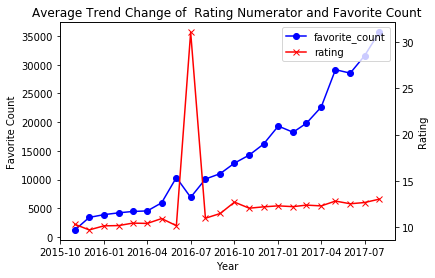

In [97]:
# Plot the trend change of 'rating_numerator' and 'favorite_count' based on the 'year_month'
fig, ax1 = plt.subplots()
plt.title('Average Trend Change of  Rating Numerator and Favorite Count')
plt.xlabel('Year')

ax1.plot(trend_change['year_month'],trend_change['favorite_count'], marker='o', color='blue')
ax1.set_ylabel("Favorite Count")

ax2 = ax1.twinx()
ax2.plot(trend_change['year_month'],trend_change['rating'], marker='x', color='red')
ax2.set_ylabel("Rating")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines1 + lines2, labels1 + labels2, loc=0)

plt.show()

#### Answers for Insight 1:
- The average rating numerator for dogs keeps a wavy but steady rise except the period between 2016-06 to 2016-08, which means the rate of dogs might becomes relaxed gradually.
- The trend of favorite count also increases with a relatively steady rate with time goes by.
- The average rate of dogs reach to about 31 in July, 2016, and this means in this month, the rate might have some outliers.
- The prediction confidence remains a relatively consist range which is from 0.5 to 0.7, and because this range is always over than 0.5, the prediction might be ok.

### Insight 2
#### Questions:
- How about the correlation between dog breed and the rate? And what is the highest average rate of all dog breed? what about the lowest average rate?

In [98]:
# Consider the prediction confidence and missing breed of dogs will affect the result, 
# just consider dogs whose prediction confidence equal or more than 0.5, and breed is not 'None'
dog_breed_rate = twitter_clean[(twitter_clean.prediction_confidence >= 0.5) & (twitter_clean.dog_breed != 'None')] 

In [99]:
dog_breed_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id                 936 non-null int64
timestamp                936 non-null datetime64[ns]
source                   936 non-null object
text                     936 non-null object
expanded_urls            936 non-null object
rating_numerator         936 non-null int64
rating_denominator       936 non-null int64
name                     936 non-null object
dog_stage                936 non-null object
retweet_count            936 non-null int64
favorite_count           936 non-null int64
jpg_url                  936 non-null object
dog_breed                936 non-null object
prediction_confidence    936 non-null float64
rating                   936 non-null float64
year_month               936 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 124.3+ KB


In [100]:
# Use group by to get the average rate and tweet_id based on each dog breed
dog_breed_rate = dog_breed_rate.groupby('dog_breed', as_index=False).agg({'tweet_id':'count', 'rating':'mean'})
dog_breed_rate.head()

,dog_breed,tweet_id,rating
0,Afghan Hound,1,13.000000
1,Airedale,6,10.166667
2,American Staffordshire Terrier,9,11.111111
3,Appenzeller,1,9.000000
4,Basenji,3,10.333333


In [101]:
dog_breed_rate.sort_values(by=['rating'], ascending=False)

,dog_breed,tweet_id,rating
24,Clumber,1,27.000000
0,Afghan Hound,1,13.000000
80,Saluki,3,13.000000
27,Curly Coated Retriever,1,13.000000
17,Briard,2,12.500000
89,Tibetan Mastiff,3,12.333333
68,Norfolk Terrier,1,12.000000
49,Irish Water Spaniel,1,12.000000
47,Irish Setter,2,12.000000
92,Toy Terrier,1,12.000000


In [391]:
# The count of tweet_id is one of the reason which will affect the result of analysis, 
# so it is better to use the dog breed which have more than 10 tweet_id count
dog_breed_rate = dog_breed_rate[dog_breed_rate['tweet_id'] > 10].sort_values(by=['rating'], ascending=False)

In [392]:
dog_breed_rate.sort_values(by=['rating'], ascending=False)

,dog_breed,tweet_id,rating
81,Samoyed,30,11.733333
23,Chow,26,11.730769
40,Golden Retriever,116,11.672414
20,Cardigan,12,11.666667
73,Pembroke,70,11.657143
25,Cocker Spaniel,14,11.357143
60,Malamute,18,11.333333
91,Toy Poodle,24,11.208333
36,French Bulldog,21,11.190476
56,Labrador Retriever,65,11.184615


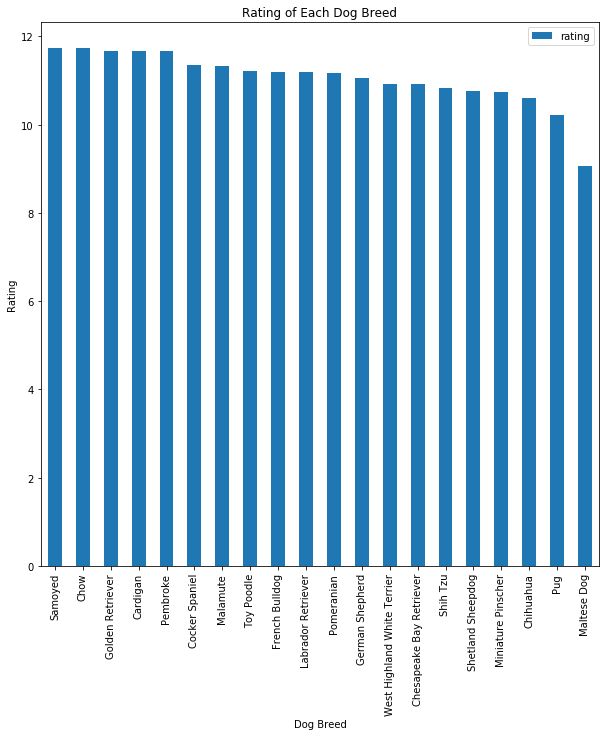

In [393]:
# Plot a bar chart to display the specific dog breed's rate
dog_breed_rate.plot.bar('dog_breed', 'rating', figsize=(10,10), xlim=(9,18))
plt.xlabel('Dog Breed')
plt.ylabel('Rating')
plt.title('Rating of Each Dog Breed')
plt.show()

#### Answers for Insight 2:
- Excluding impact of the prediction confidence, missing dog breed, and the outlierthe based on the tweet id, the top three dog breed of rating are 'Samoyed', 'Chow', and 'Golden Retriever', and the bottom third dog breed of rating are 'Chihuahua', 'Pug', and 'Maltese Dog'.

### Insight 3
#### Questions:
- What is the correlation between rating and the count of public favorite? Whether the higher the rating is, the more public will like this twitter?

In [394]:
# Use group by to get the favorite count of each rating
favorite_rate = twitter_clean.groupby('rating', as_index=False).agg({'favorite_count':'mean'})
favorite_rate

,rating,favorite_count
0,0.0,13434.500000
1,1.0,5527.600000
2,2.0,2385.700000
3,3.0,2309.210526
4,4.0,2640.800000
5,5.0,3836.303030
6,6.0,2622.687500
7,7.0,3616.230769
8,8.0,2365.431579
9,9.0,2570.177632


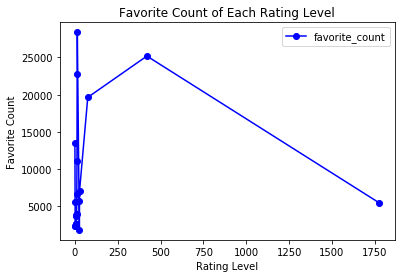

In [395]:
# Plot the favorite count change of each rate level
fig, ax1 = plt.subplots()
plt.title('Favorite Count of Each Rating Level')
plt.xlabel('Rating Level')

ax1.plot(favorite_rate['rating'],favorite_rate['favorite_count'], marker='o', color='blue')
ax1.set_ylabel("Favorite Count")

lines1, labels1 = ax1.get_legend_handles_labels()

plt.legend(lines1, labels1, loc=0)

plt.show()

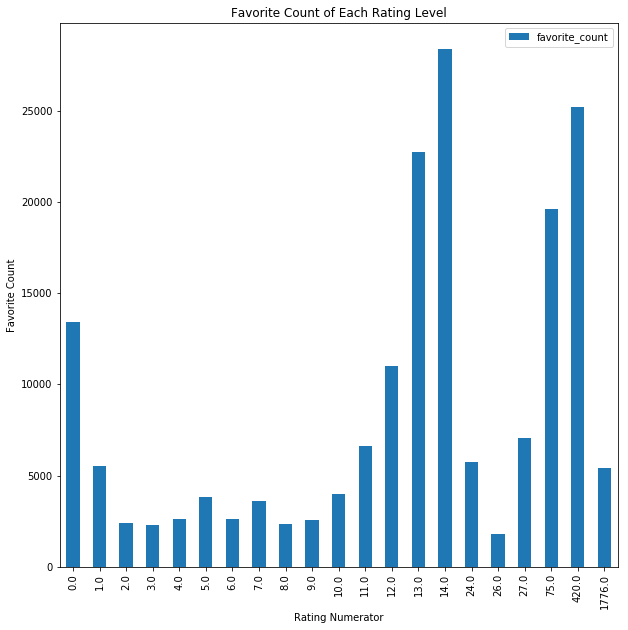

In [396]:
# Plot a bar chart to display favorite count of each rate
favorite_rate.plot.bar('rating', 'favorite_count', figsize=(10,10), xlim=(9,18))
plt.xlabel('Rating Numerator')
plt.ylabel('Favorite Count')
plt.title('Favorite Count of Each Rating Level')
plt.show()

#### Answers for Insight 3:
- From these two diagrams, it is hard to say these two variables have a direct correlation, but the result shows that it doesn't make sense to say the higher the rating is, the more public will like this twitter.
- From the first figure, it looks like that most of the ratings focus on the level below to 250,which means the ratings over 250 might be outliers or mistaken records.
- From the second figure, it is clear that the rate in 14 owns the most count in public favorite twitter, and the rate in 26 gets the least favor in twitter.

### Visualization
#### Heatmap
It is useful to create heatmap to get the correlation coefficient of each varible, and in this project, I choose to use pearson method as standard.

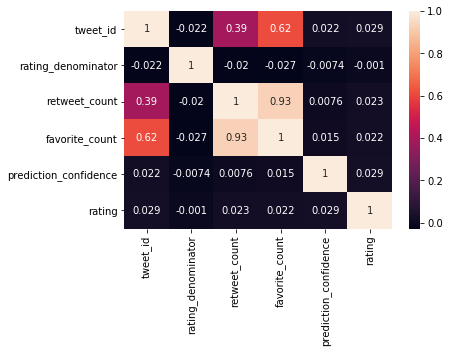

In [398]:
# Plot the heatmap to display the correlation coefficient
twitter_clean = twitter_clean.drop('rating_numerator', axis=1)
twitter_clean_corr = twitter_clean.corr(method = 'pearson')
sns.heatmap(twitter_clean_corr, annot=True);

#### Insight:
- The most powerful correlation is between 'retweet_count' and 'favorite_count', whose correlation coefficient is 0.93.
- The weakest correlation is between 'rating_denominator' and 'rating', whose correlation coefficient is -0.001.

## 4. Conclusion
This project is primarily about how to gather, assess, and clean a dataset using Twitter API, and it chooses a famous Twitter host - 'WeRateDogs' to get the rates and text about the dogs attached with some surrounded information, like .jpg image URL, dogs' name, and so on. After the analysis and visualization, it gets many result which shows various of laws based on the cleaned datatset which is called 'twitter_clean.csv' file.

### References
- https://blog.csdn.net/liangzuojiayi/article/details/78184687
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
- https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
- https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://wiki.python.org/moin/HandlingExceptions
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/